In [75]:
import networkx as nx
import json
import matplotlib.pyplot as plt
from matplotlib import pylab

G = nx.DiGraph()

with open('./posts.json') as f:
  posts = json.load(f)

for post in posts:
    # print(post)
    if post['root'] is True:
        G.add_node(post['user_id'])
    else:
        if post['is_not_push_post'] is True:
            G.add_edge(post['user_id'], post['reply_to'], weight=0.3)
        else:
            G.add_edge(post['user_id'], post['reply_to'], weight=1)
        

In [76]:
print(G.number_of_nodes())
print(G.number_of_edges())

4350
7407


In [73]:
nx.hits(G)

({'252142': 0.00020932620570530668,
  '321345': 0.00046736136918896896,
  '288093': 5.964832575121166e-07,
  '19842': 1.7894497725363498e-07,
  '303977': 5.964832575121166e-07,
  '61776': 1.7894497725363498e-07,
  '229019': 5.964832575121166e-07,
  '39576': 5.964832575121166e-07,
  '78349': 2.2712481088644094e-06,
  '79410': 1.9709680055168194e-06,
  '104218': 5.964832575121166e-07,
  '61282': 0.0004191033740558242,
  '195570': 5.972887106322795e-07,
  '111153': 1.693471186586502e-05,
  '13193': 1.7894497725363498e-07,
  '54344': 8.488963080377373e-142,
  '161767': 0.0,
  '156174': 5.964832575121166e-07,
  '10998': 5.964832575121166e-07,
  '256055': 1.7894497725363498e-07,
  '199261': 1.7894497725363498e-07,
  '225898': 5.964832575121166e-07,
  '112308': 5.964832575121166e-07,
  '56428': 5.964832575121166e-07,
  '180268': 1.7894497725363498e-07,
  '281492': 5.401260180185743e-192,
  '108467': 0.0,
  '142067': 5.964832575121166e-07,
  '59297': 0.0004279364102973986,
  '49018': 0.0005237

In [44]:
 def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(10, 10), dpi=300)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.svg")

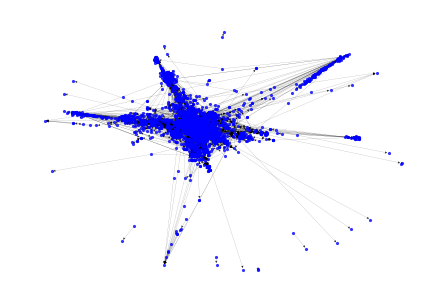

In [77]:
import matplotlib.pyplot as plt

options = {
    'node_color': 'blue',
    'node_size': 10,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
    'alpha': 0.8,
    'arrowsize': 5
}
nx.draw(G, **options)
plt.show()